# Extract OpenStreetMap data from cities

### Data to extract:
* Buildings
* Building parts
* Points of Interest (POIs)

### An input region of interest can be extracted by:
* Place + which result: The name of the city/region, and the result to retrieve (as seen in OpenStreetMap result order)
* Poylygon: A polygon delimitating the region of interest
* Bounding box: Using northing, southing, easting, and westing coordinates 
* Point + distance (meters): Use the (latitude, longitude) central point and an input distance around it
* Address + distance (meters): Set the address as central point and an input distance around it
* [Additional option] Date: Retrieve the region's database state in the past

In [1]:
# For graphs
%matplotlib inline

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import osmnx as ox
from urbansprawl.core import get_processed_osm_data

ox.config(log_file=True,log_console=True, log_name='osm_cities', log_filename='osm_cities', use_cache=True)
figsize = (8,6)

## Manhattan
* Retrieve the second result for "Manhattan, New York"

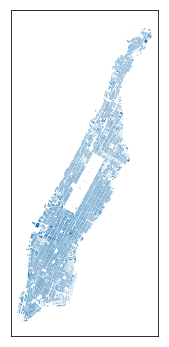

In [2]:
# Retrieve OSM data
region_args = {"place":"Manhattan, New York", "which_result":2 }
df_osm_built, df_osm_building_parts, df_osm_pois = get_processed_osm_data(city_ref_file = 'Manhattan_island', region_args = region_args)
# Plot
ax = df_osm_built.plot(figsize=figsize)
ax.get_xaxis().set_visible(False);ax.get_yaxis().set_visible(False)

## Paris
* Retrieve the OSM request for "Paris, France"

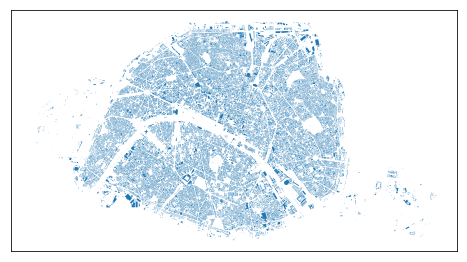

In [3]:
# Retrieve OSM data
region_args = {"place":"Paris, France"}
df_osm_built, df_osm_building_parts, df_osm_pois = get_processed_osm_data(city_ref_file = 'Paris_France', region_args = region_args)

# Plot
ax = df_osm_built.plot(figsize=figsize)
ax.get_xaxis().set_visible(False);ax.get_yaxis().set_visible(False)

## London
* Using a defined bounding box

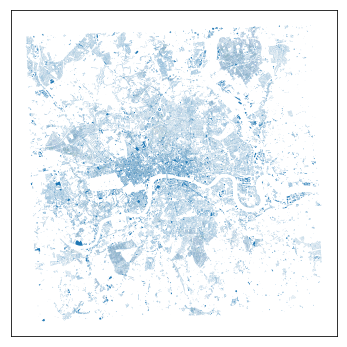

In [4]:
# Retrieve OSM data
region_args = {"north":51.608, "west":-0.25, "south":51.415, "east":0.06}
df_osm_built, df_osm_building_parts, df_osm_pois = get_processed_osm_data(city_ref_file = 'London', region_args = region_args)

# Plot
ax = df_osm_built.plot(figsize=figsize)
ax.get_xaxis().set_visible(False);ax.get_yaxis().set_visible(False)

## Grenoble 3 years ago
* Retrieve the state of the database 3 years ago

Retrieve state of the city for the following date: 2015-08-18 12:49:56.587897


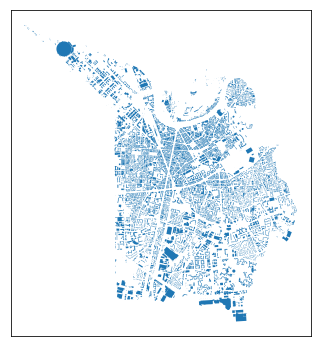

In [5]:
from datetime import datetime, timedelta
# 1 year ~ 52.143 weeks in a common year (not a lap year)
one_year_weeks, years = 52.143, 3
date = datetime.utcnow() - timedelta( weeks = one_year_weeks*years )
print( "Retrieve state of the city for the following date:", date )

# Retrieve OSM data
kwargs={'retrieve_graph': True, 'default_height': 3, 'meters_per_level': 3, 'associate_landuses_m2': True, 'mixed_building_first_floor_activity': True, 'minimum_m2_building_area': 9, 'date': date}
region_args = {"place":"Grenoble, France"}
df_osm_built, df_osm_building_parts, df_osm_pois = get_processed_osm_data(city_ref_file = 'Grenoble_old', region_args = region_args, kwargs = kwargs)

# Plot
ax = df_osm_built.plot(figsize=figsize)
ax.get_xaxis().set_visible(False);ax.get_yaxis().set_visible(False)